2018.01.22

# Plotting 02

In [4]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

## Import the variables from other notebooks

In [5]:
%store -r data
%store -r col_year_month
%store -r col_categorical
%store -r col_target
%store -r col_numeric
%store -r combined_list
%store -r data_for_models


## Scale and Remove Outliers

### Hack a scipy function to remove the outliers

```
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
```

In [6]:
from scipy import stats

In [7]:
no_outliers = data[col_numeric][(np.abs(stats.zscore(data[col_numeric])) < 3).all(axis=1)]

In [8]:
no_outliers.head()

,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1,588.0,34.71,4.71,19.77,0.32,38.49,13.0,2.0,5170.0,1754.0,312.0,655.0,16.0,2433.0
2,607.0,35.52,5.40,23.55,0.00,27.52,12.0,2.0,4485.0,1857.0,198.0,715.0,0.0,1715.0
4,327.0,23.67,1.47,14.50,0.06,19.29,0.0,0.0,2276.0,985.0,94.0,373.0,5.0,819.0
7,661.0,50.08,7.39,15.91,0.00,35.61,8.0,1.0,6142.0,2707.0,394.0,490.0,0.0,2551.0
9,1639.0,143.71,13.08,158.40,1.09,92.72,55.0,2.0,19038.0,8099.0,676.0,4865.0,35.0,5363.0


### Scale

In [9]:
from sklearn.preprocessing import scale
no_outliers_scaled = pd.DataFrame(scale(no_outliers))
no_outliers_scaled.columns = no_outliers.columns
# no_outliers_scaled

In [10]:
# no_zeroes
no_zeroes_scaled = no_outliers_scaled[no_outliers_scaled > 0]

In [11]:
# it wold also be useful to have this variable not scaled, so we can see the true values in a plot.
data_no_outliers = no_outliers[no_outliers > 0]

## Linear Correlation Coefficients

In [12]:
# combine col_numeric and target to get the .corr() values
pre_combine_scatter = [col_numeric, col_target]
combined_list_scatter = [item for sublist in pre_combine_scatter for item in sublist]

In [13]:
data[combined_list_scatter].corr()['target']

arr_flights            0.283758
carrier_ct             0.323859
weather_ct             0.243806
nas_ct                 0.277520
security_ct            0.190799
late_aircraft_ct       0.294210
arr_cancelled          0.192698
arr_diverted           0.166036
arr_delay              0.278043
carrier_delay          0.257489
weather_delay          0.215498
nas_delay              0.240784
security_delay         0.163779
late_aircraft_delay    0.277989
target                 1.000000
Name: target, dtype: float64

In [14]:
data[combined_list_scatter].corr()['target'].nlargest(15)

target                 1.000000
carrier_ct             0.323859
late_aircraft_ct       0.294210
arr_flights            0.283758
arr_delay              0.278043
late_aircraft_delay    0.277989
nas_ct                 0.277520
carrier_delay          0.257489
weather_ct             0.243806
nas_delay              0.240784
weather_delay          0.215498
arr_cancelled          0.192698
security_ct            0.190799
arr_diverted           0.166036
security_delay         0.163779
Name: target, dtype: float64

# Use the imported dataset with dummies
- `data_for_models`

In [15]:
corr_coeffs = data_for_models.corr()['target']
# corr_coeffs

In [16]:
corr_coeffs.nlargest(11)

target                 1.000000
carrier_ct             0.323859
late_aircraft_ct       0.294210
arr_flights            0.283758
arr_delay              0.278043
late_aircraft_delay    0.277989
nas_ct                 0.277520
carrier_delay          0.257489
weather_ct             0.243806
nas_delay              0.240784
weather_delay          0.215498
Name: target, dtype: float64

In [17]:
corr_coeffs.nsmallest(11)

carrier_AS    -0.144653
carrier_OO    -0.138315
carrier_HA    -0.062992
airport_MTJ   -0.061585
airport_BMI   -0.059403
airport_MDT   -0.058788
carrier_DL    -0.057561
months_11     -0.056320
airport_ILM   -0.053226
months_10     -0.053220
airport_MFE   -0.052491
Name: target, dtype: float64

### Re-plot Histograms with `data_for_models`
- includes dummies


__mean__: white line


__median__: red line

this giant dataframe is creashing the plotter...

I will break up `data_for_models` into even slices

In [18]:
# div_1 = data_for_models[:25]

# div_2 = data_for_models[25: 50]
# div_3 = data_for_models[50:75]
# div_4 = data_for_models[75:100]
# div_5 = data_for_models[100:125]
# div_6 = data_for_models[125:150]
# div_7 = data_for_models[150:175]
# div_8 = data_for_models[175:200]
# div_9 = data_for_models[200:225]
# div_10 = data_for_models[225:250]
# div_11 = data_for_models[250:275]
# div_12 = data_for_models[275:300]
# div_13 = data_for_models[300:325]
# div_14 = data_for_models[325:345]


In [19]:
div_1 = data_for_models[0:20]
div_2 = data_for_models[20: 40]
div_3 = data_for_models[40:60]
div_4 = data_for_models[60:80]
div_5 = data_for_models[80:100]
div_6 = data_for_models[100:120]
div_7 = data_for_models[120:140]
div_8 = data_for_models[140:160]
div_9 = data_for_models[160:180]
div_10 = data_for_models[180:200]
div_11 = data_for_models[200:220]
div_12 = data_for_models[220:240]
div_13 = data_for_models[240:260]
div_14 = data_for_models[260:280]
div_15 = data_for_models[280:300]
div_16 = data_for_models[300:120]
div_17 = data_for_models[320:140]
div_18 = data_for_models[340:345]




In [21]:
%store -r months_dummies

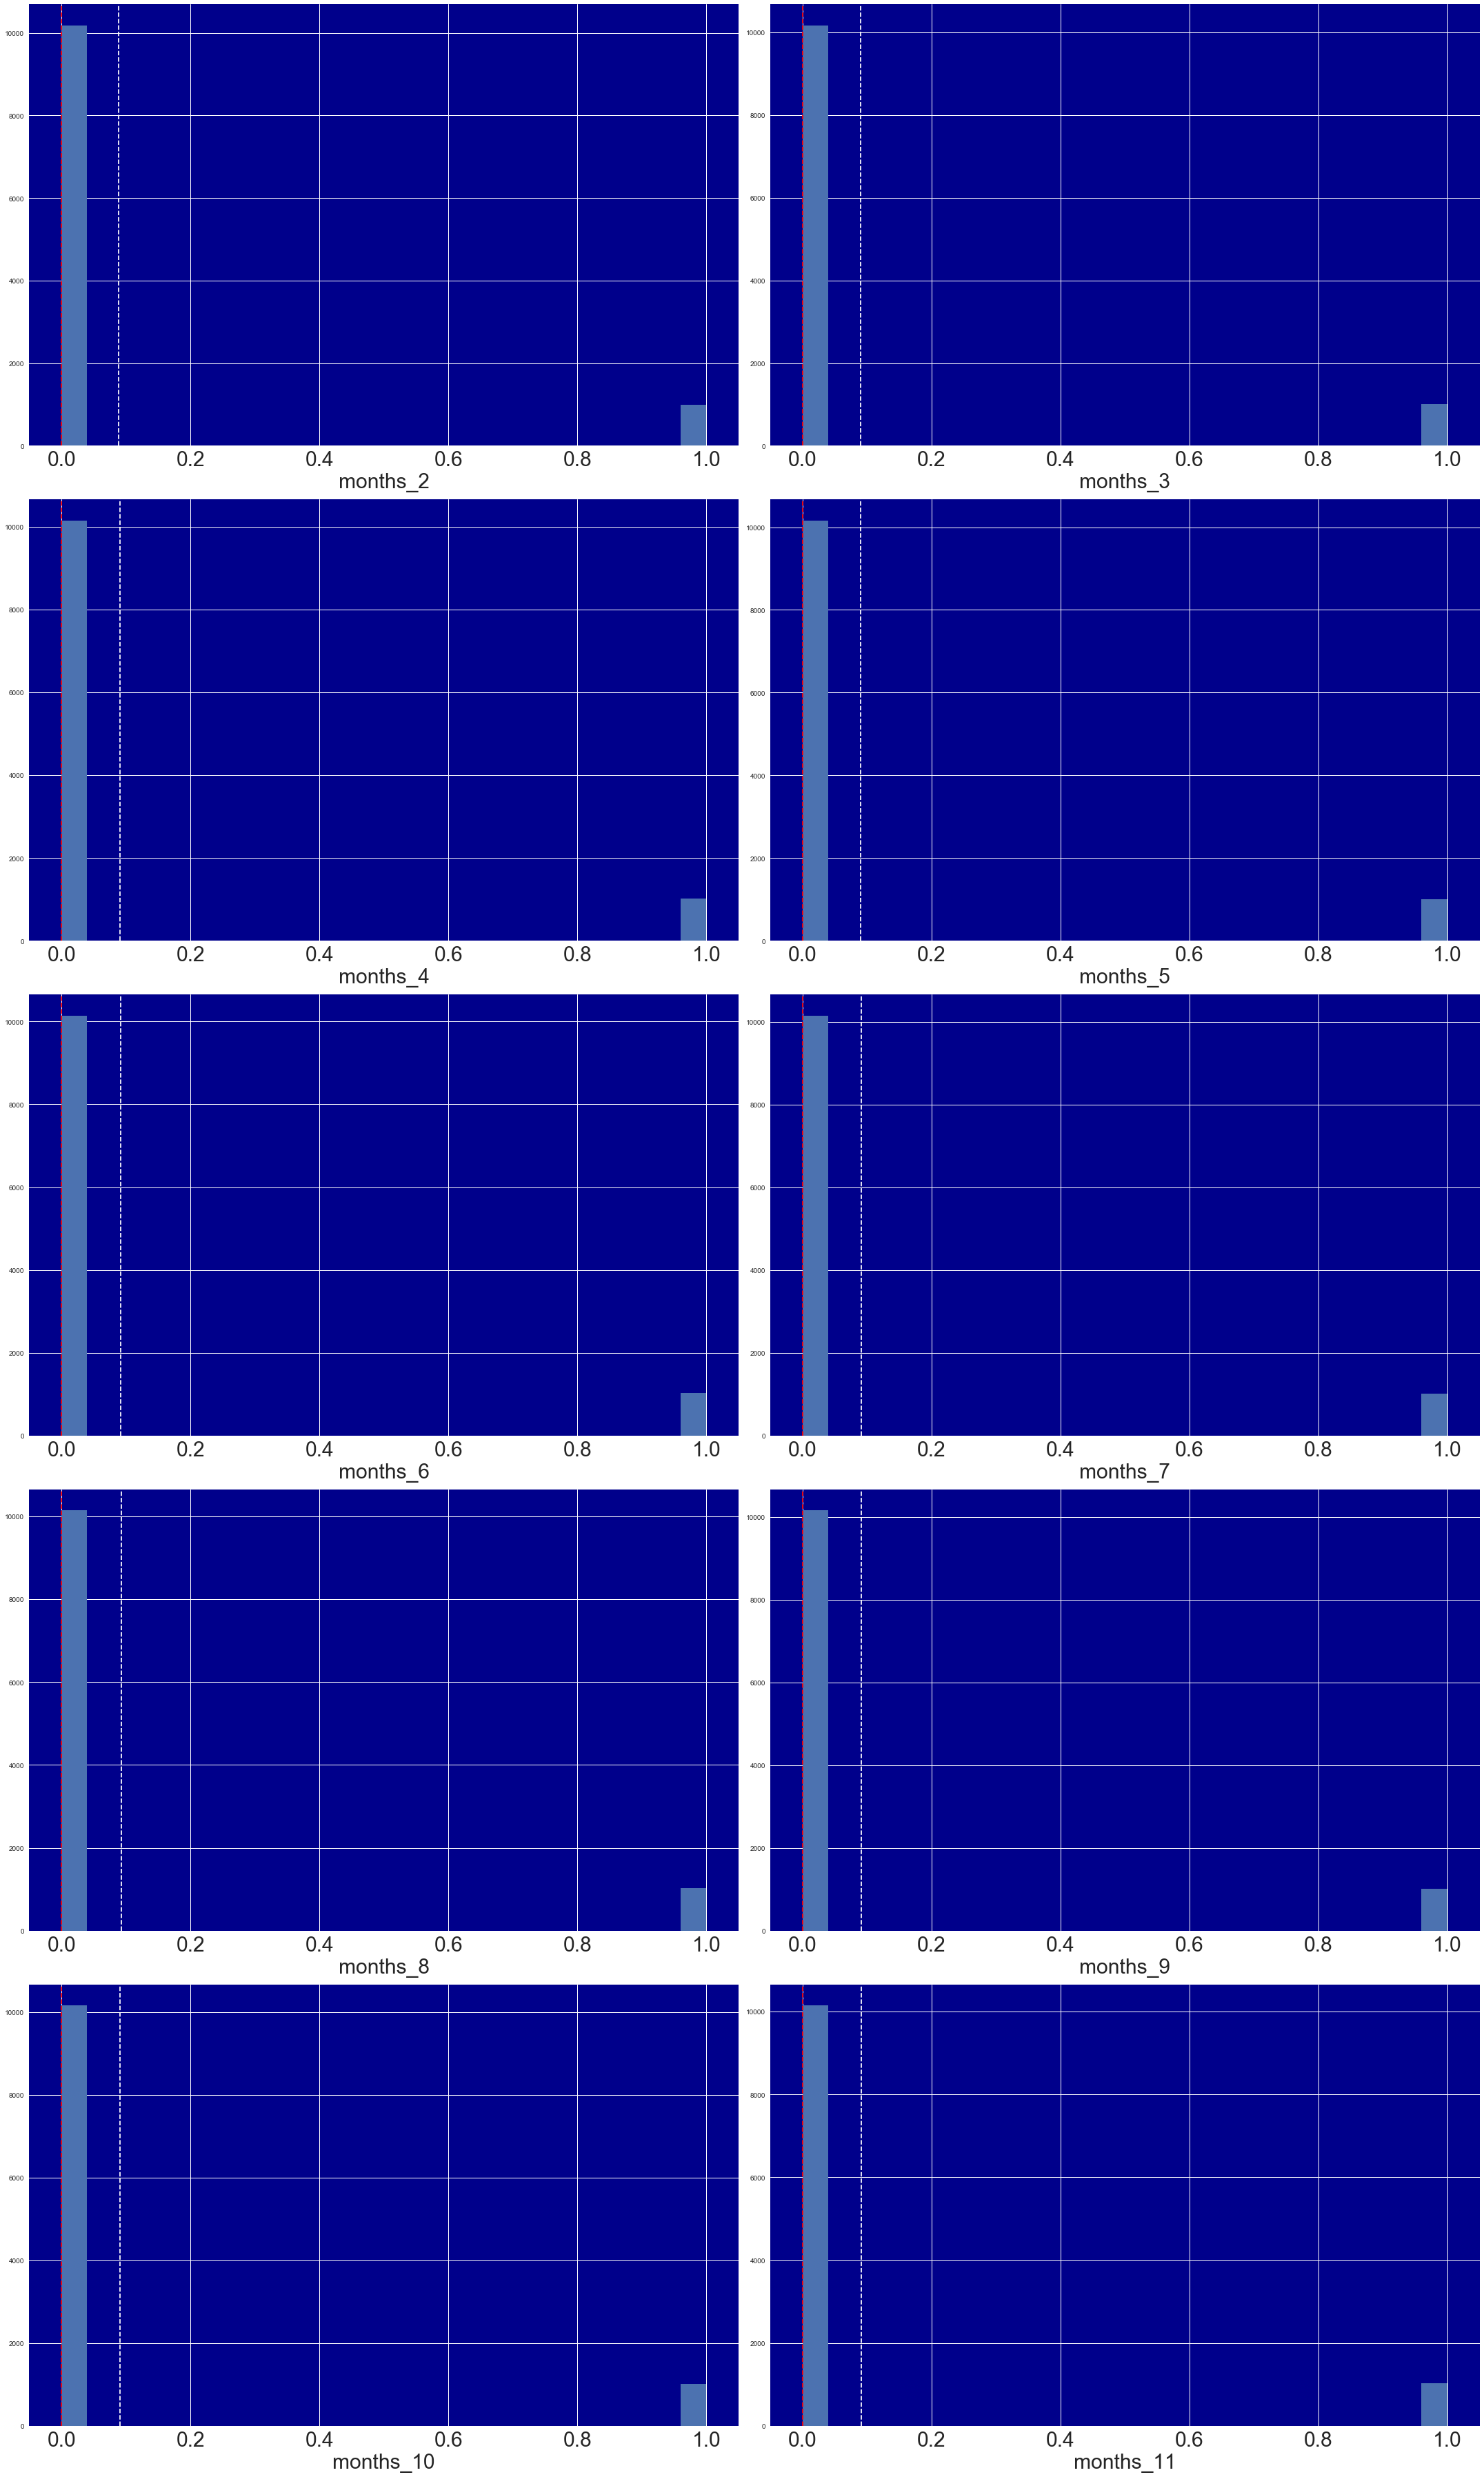

In [23]:
rows = len(months_dummies.columns)//2
fig = plt.figure(figsize=(30, 10*rows))

for i, col in enumerate(months_dummies.columns):
    fig.add_subplot(rows, 2, i+1, facecolor='darkblue')
    plt.axvline(np.mean(months_dummies[col]), linestyle='--', color='w')
    plt.axvline((months_dummies[col]).median(), linestyle='--', color='r')
    months_dummies[col].hist(bins=25, normed=False)
    plt.xticks(size = 30)
    plt.xlabel(col, size=30)
    plt.tight_layout()
plt.show()

#### Plot div_1 histograms

In [ ]:
rows = len(div_1.columns)//2
fig = plt.figure(figsize=(30, 2*rows))

for i, col in enumerate(div_1.columns):
    fig.add_subplot(rows, 2, i+1, facecolor='darkblue')
    plt.axvline(np.mean(div_1[col]), linestyle='--', color='w')
    plt.axvline((div_1[col]).median(), linestyle='--', color='r')
    div_1[col].hist(bins=25, normed=False)
    plt.xticks(size = 30)
    plt.xlabel(col, size=30)
    plt.tight_layout()
plt.show()

#### Plot div_2 histograms

In [ ]:
rows = len(data_for_models.columns)//2
fig = plt.figure(figsize=(30, 5*rows))

for i, col in enumerate(data_for_models.columns):
    fig.add_subplot(rows, 2, i+1, facecolor='blue')
    plt.axvline(np.mean(data_for_models[col]), linestyle='--', color='w')
    plt.axvline((data_for_models[col]).median(), linestyle='--', color='r')
    data_for_models[col].hist(bins=25, normed=False)
    plt.xticks(size = 30)
    plt.xlabel(col, size=30)
    plt.tight_layout()

#### Plot div_3 histograms

In [ ]:
rows = len(data_for_models.columns)//2
fig = plt.figure(figsize=(30, 5*rows))

for i, col in enumerate(data_for_models.columns):
    fig.add_subplot(rows, 2, i+1, facecolor='lightblue')
    plt.axvline(np.mean(data_for_models[col]), linestyle='--', color='w')
    plt.axvline((data_for_models[col]).median(), linestyle='--', color='r')
    data_for_models[col].hist(bins=25, normed=False)
    plt.xticks(size = 30)
    plt.xlabel(col, size=30)
    plt.tight_layout()

#### Plot months_dummies histograms

In [ ]:
%store -r month_dummies

## Plot the range of medians

In [24]:
for i, col in enumerate(data_for_models.columns):
    h = data_for_models[col].median()
    print ("%s: %f" %(data_for_models.columns[i], h))

arr_flights: 133.000000
carrier_ct: 7.520000
weather_ct: 0.270000
nas_ct: 4.770000
security_ct: 0.000000
late_aircraft_ct: 6.310000
arr_cancelled: 1.000000
arr_diverted: 0.000000
arr_delay: 1174.000000
carrier_delay: 452.000000
weather_delay: 14.000000
nas_delay: 173.000000
security_delay: 0.000000
late_aircraft_delay: 404.000000
target: 1.000000
carrier_AS: 0.000000
carrier_B6: 0.000000
carrier_DL: 0.000000
carrier_EV: 0.000000
carrier_F9: 0.000000
carrier_HA: 0.000000
carrier_NK: 0.000000
carrier_OO: 0.000000
carrier_UA: 0.000000
carrier_VX: 0.000000
carrier_WN: 0.000000
airport_ABI: 0.000000
airport_ABQ: 0.000000
airport_ABR: 0.000000
airport_ABY: 0.000000
airport_ACK: 0.000000
airport_ACT: 0.000000
airport_ACV: 0.000000
airport_ACY: 0.000000
airport_ADK: 0.000000
airport_ADQ: 0.000000
airport_AEX: 0.000000
airport_AGS: 0.000000
airport_AKN: 0.000000
airport_ALB: 0.000000
airport_AMA: 0.000000
airport_ANC: 0.000000
airport_APN: 0.000000
airport_ASE: 0.000000
airport_ATL: 0.000000
ai

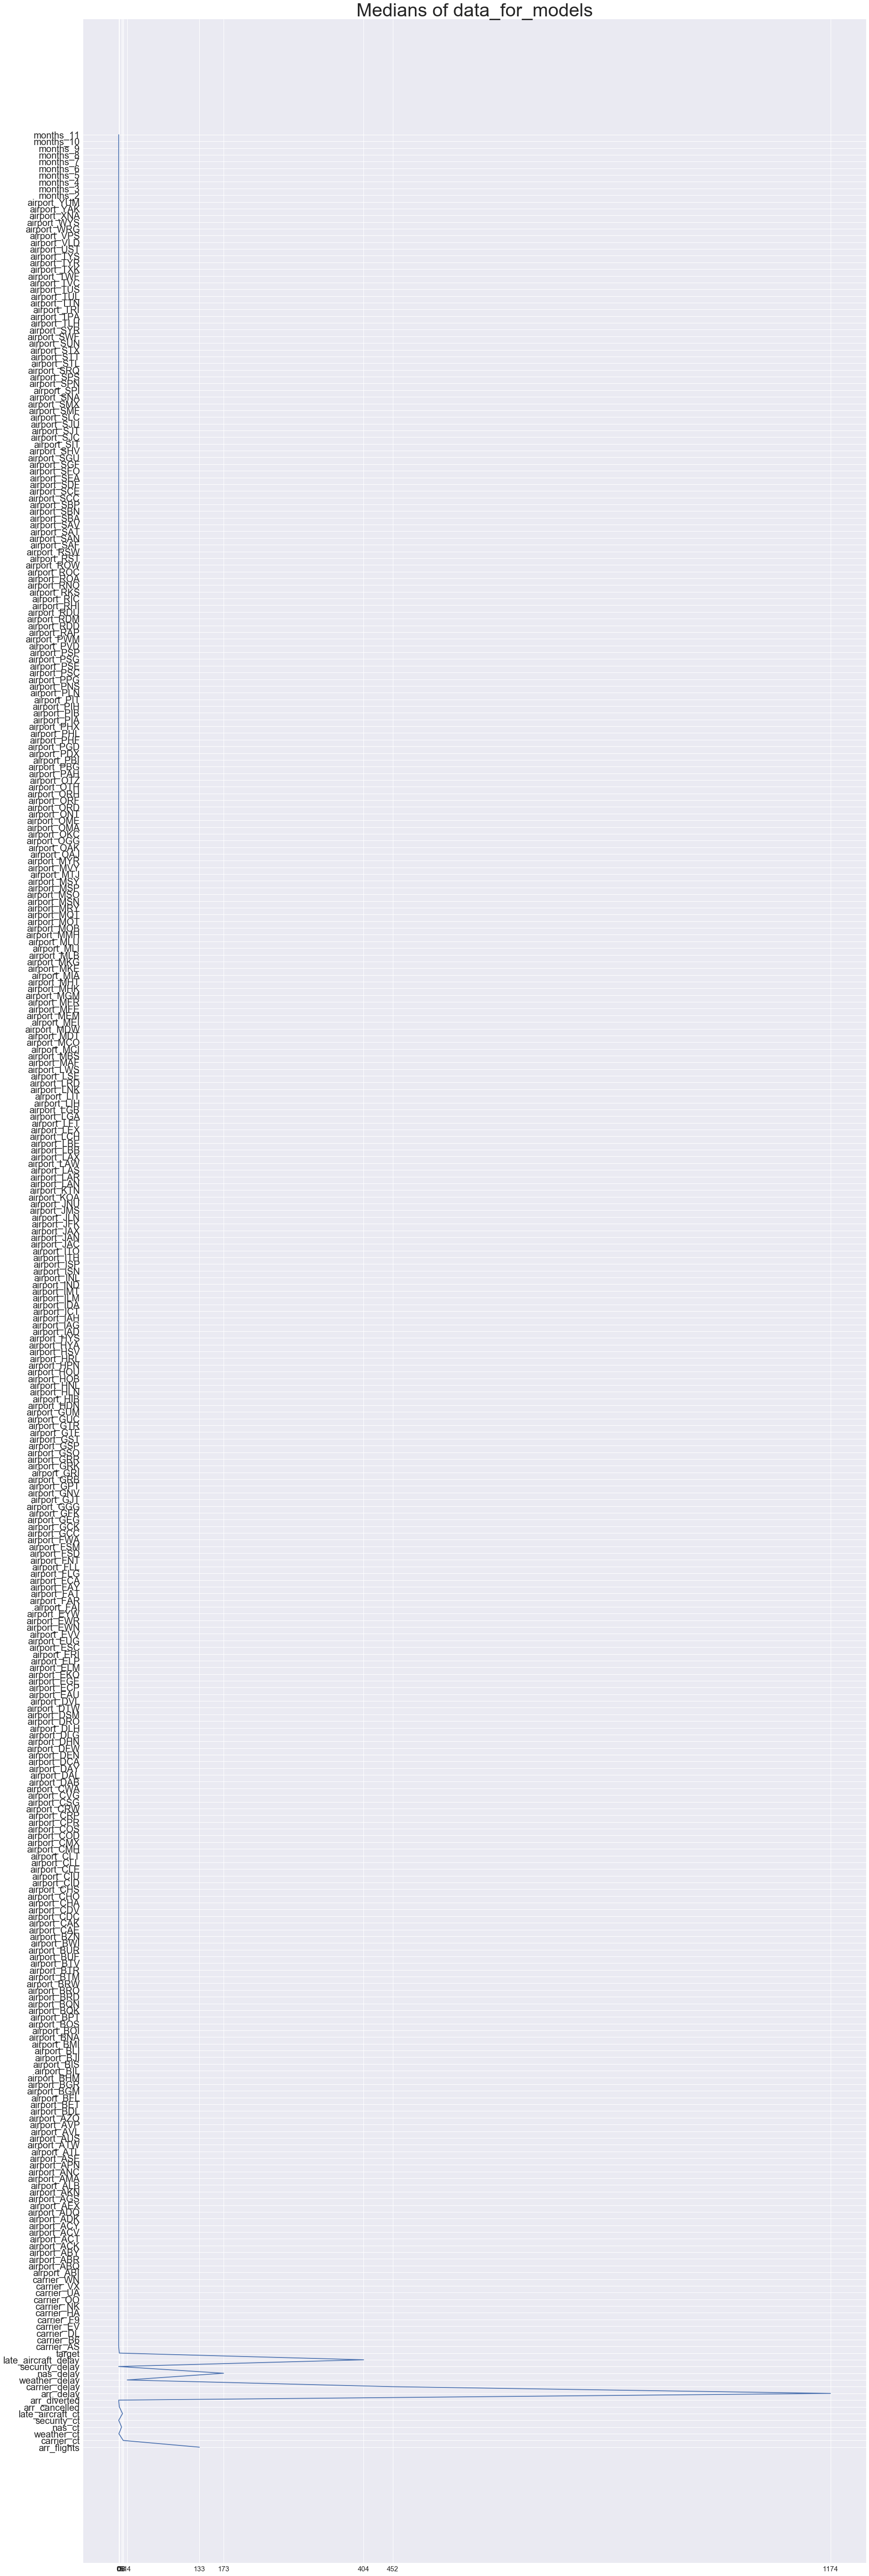

In [28]:
# Graph shows range of the medians of the numeric features
plt.figure(figsize=(30,100))
y = np.array(data_for_models.median())
x = np.array(range(len(data_for_models.columns)))
my_yticks = data_for_models.columns
plt.xticks(y, size=15)
plt.yticks(x, my_yticks, size=20)
plt.title('Medians of data_for_models', size=40)
plt.plot(y, x)

## Plot the range of means

In [25]:
for i, col in enumerate(data_for_models.columns):
    h = data_for_models[col].mean()
    print ("%s: %f" %(data_for_models.columns[i], h))

arr_flights: 461.532892
carrier_ct: 22.628786
weather_ct: 2.278168
nas_ct: 24.216326
security_ct: 0.146415
late_aircraft_ct: 27.759464
arr_cancelled: 5.226528
arr_diverted: 1.109371
arr_delay: 4762.861541
carrier_delay: 1557.819565
weather_delay: 203.253379
nas_delay: 1140.141233
security_delay: 6.610669
late_aircraft_delay: 1855.036696
target: 0.595274
carrier_AS: 0.063904
carrier_B6: 0.063278
carrier_DL: 0.146066
carrier_EV: 0.159313
carrier_F9: 0.049315
carrier_HA: 0.016737
carrier_NK: 0.033563
carrier_OO: 0.186342
carrier_UA: 0.085384
carrier_VX: 0.020496
carrier_WN: 0.085205
airport_ABI: 0.000537
airport_ABQ: 0.007876
airport_ABR: 0.000985
airport_ABY: 0.000985
airport_ACK: 0.000537
airport_ACT: 0.001074
airport_ACV: 0.000985
airport_ACY: 0.000985
airport_ADK: 0.000985
airport_ADQ: 0.000985
airport_AEX: 0.000985
airport_AGS: 0.002059
airport_AKN: 0.000269
airport_ALB: 0.006892
airport_AMA: 0.003312
airport_ANC: 0.004296
airport_APN: 0.000985
airport_ASE: 0.000985
airport_ATL: 0.00

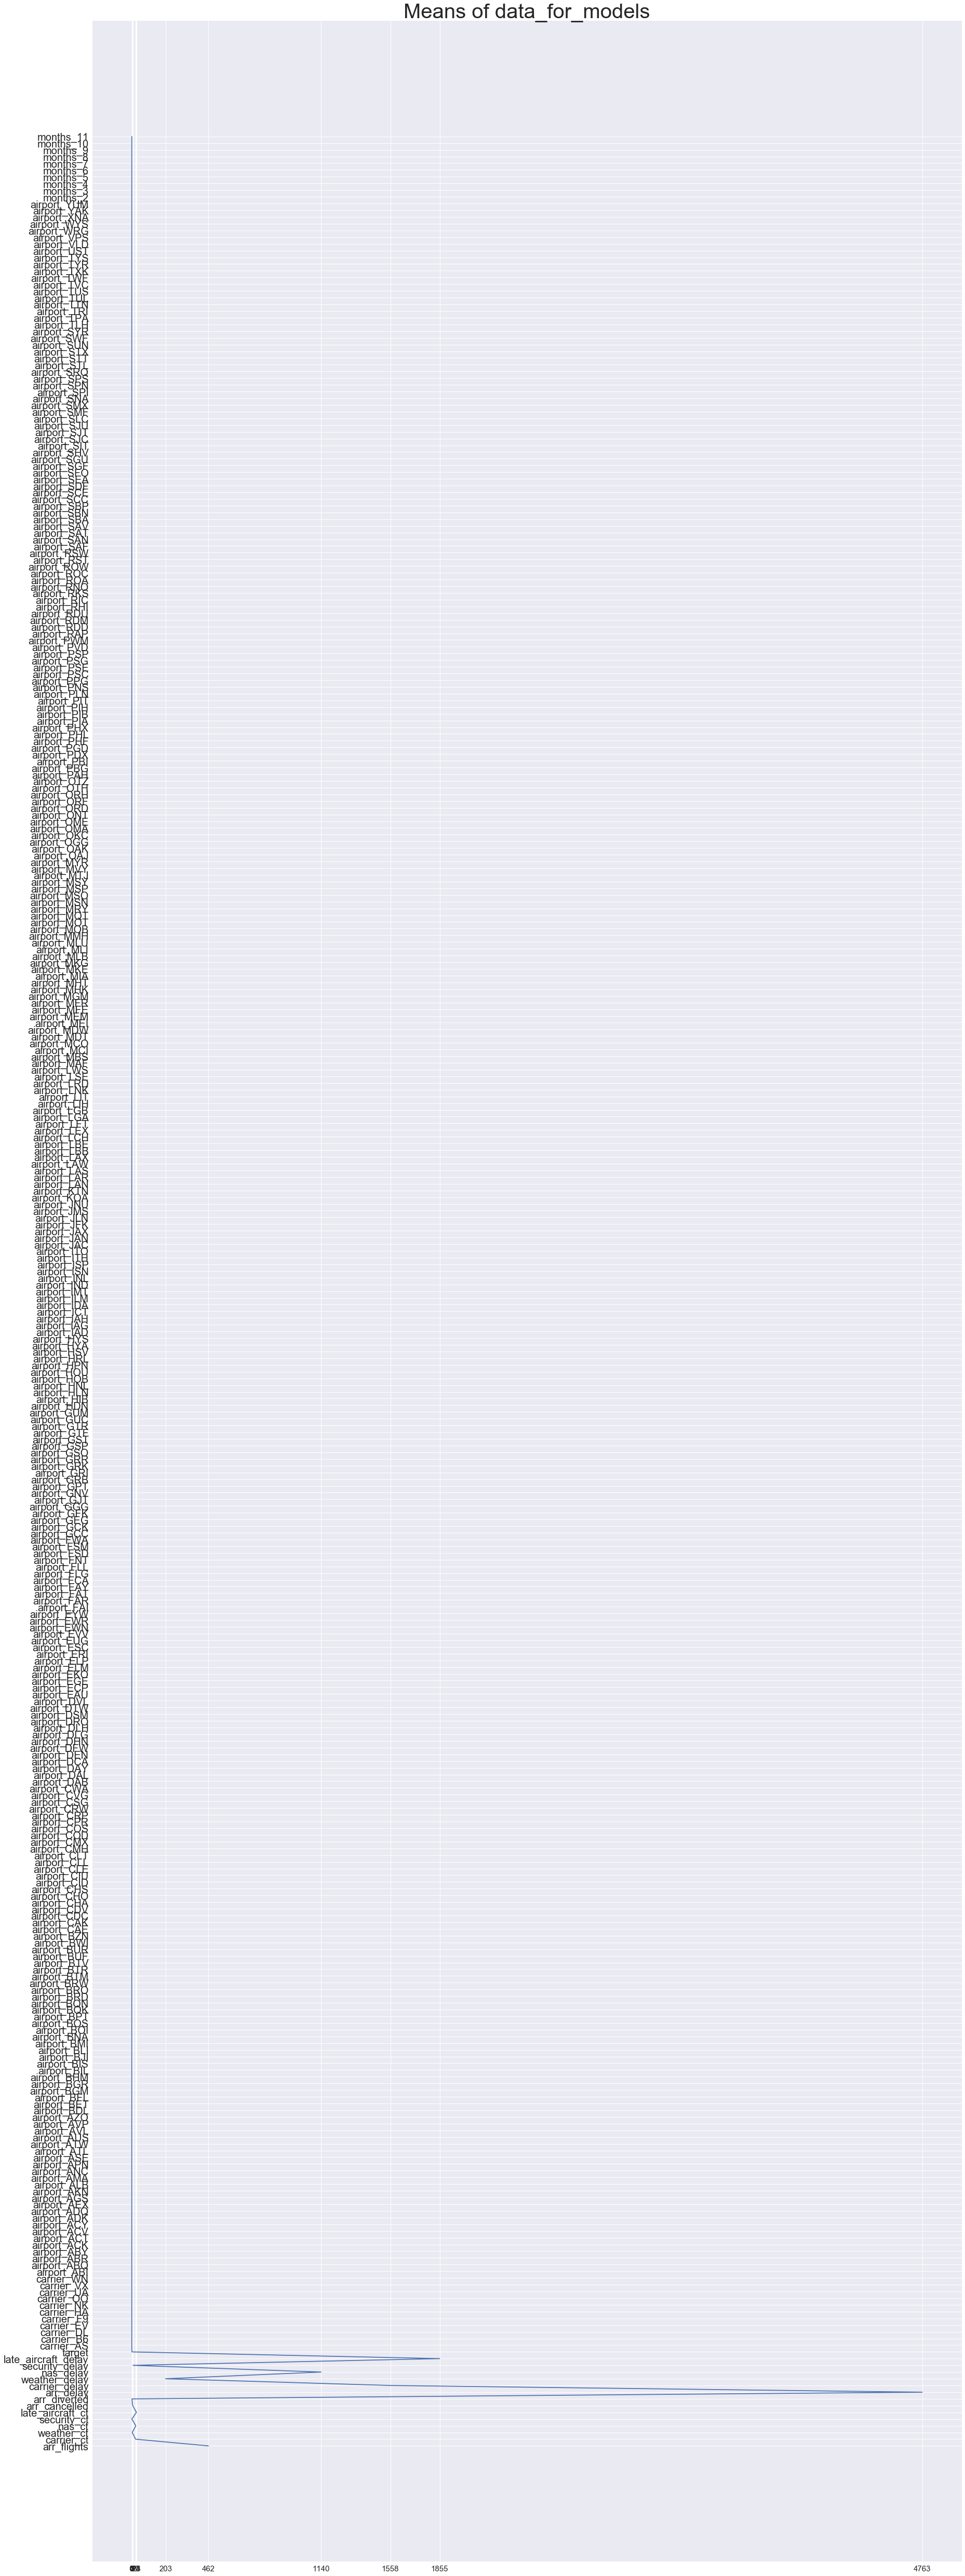

In [29]:
# Graph shows range of the medians of the numeric features
plt.figure(figsize=(30,90))
y = np.array(data_for_models.mean())
x = np.array(range(len(data_for_models.columns)))
my_yticks = data_for_models.columns
plt.xticks(y, size=15)
plt.yticks(x, my_yticks, size=20)
plt.title('Means of data_for_models', size=40)

plt.plot(y, x)

## Boxplots I

## KDE plots